C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_11536\4139994463.py:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


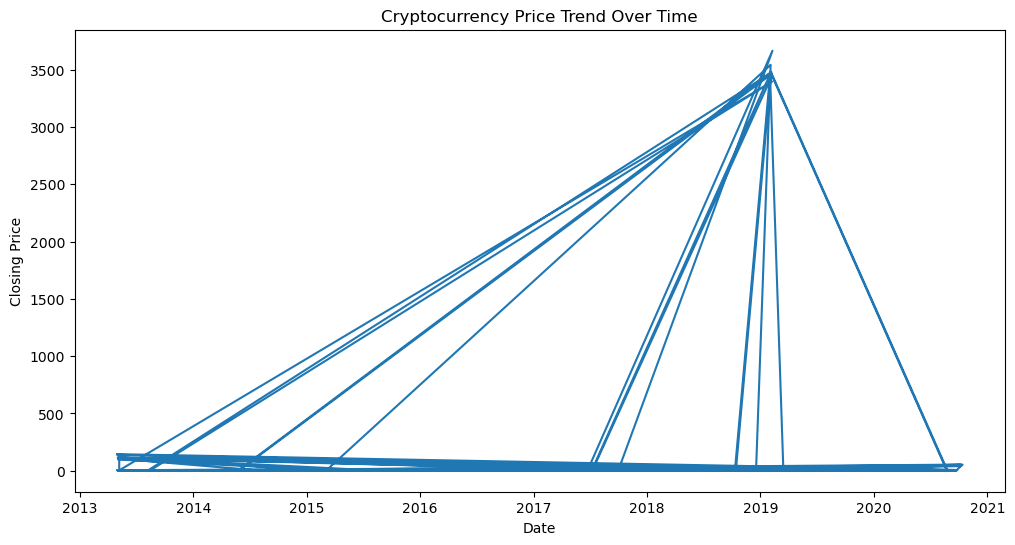

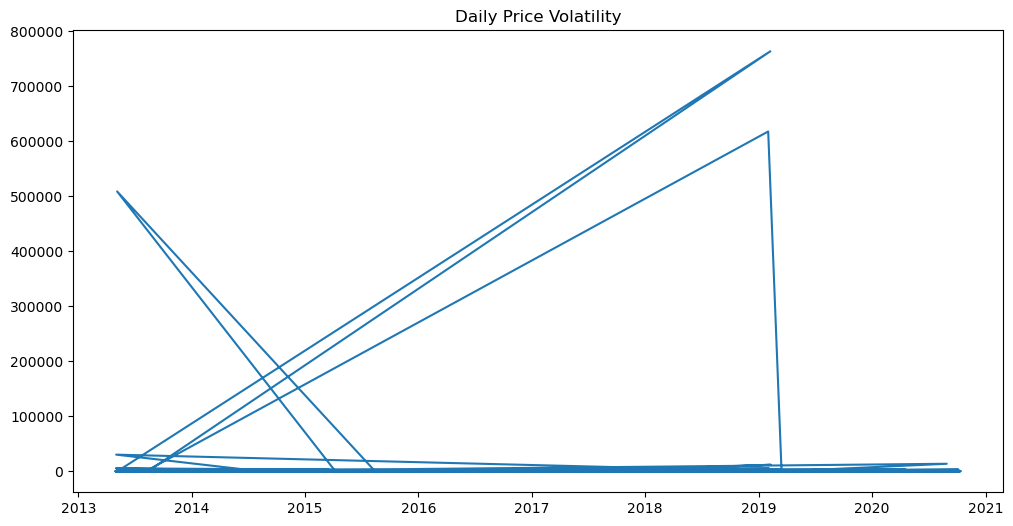

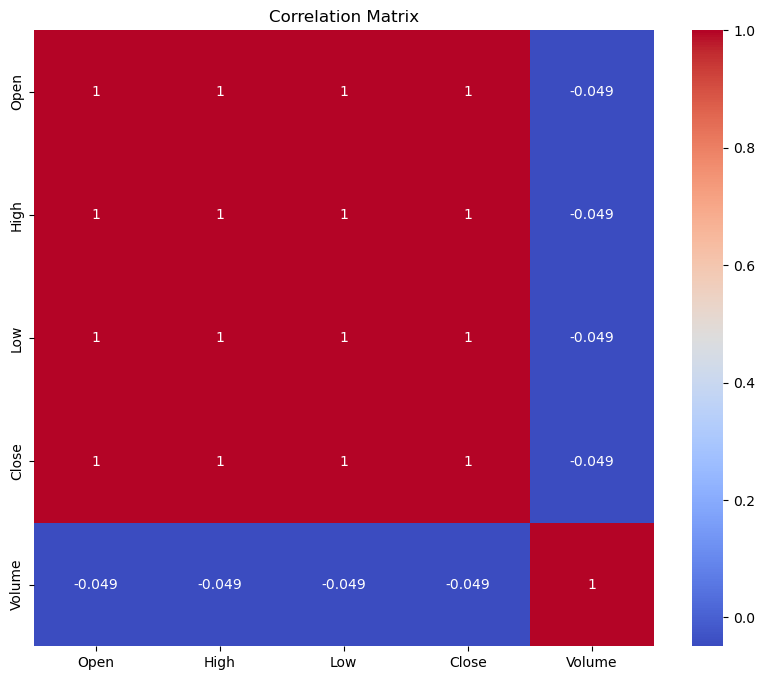

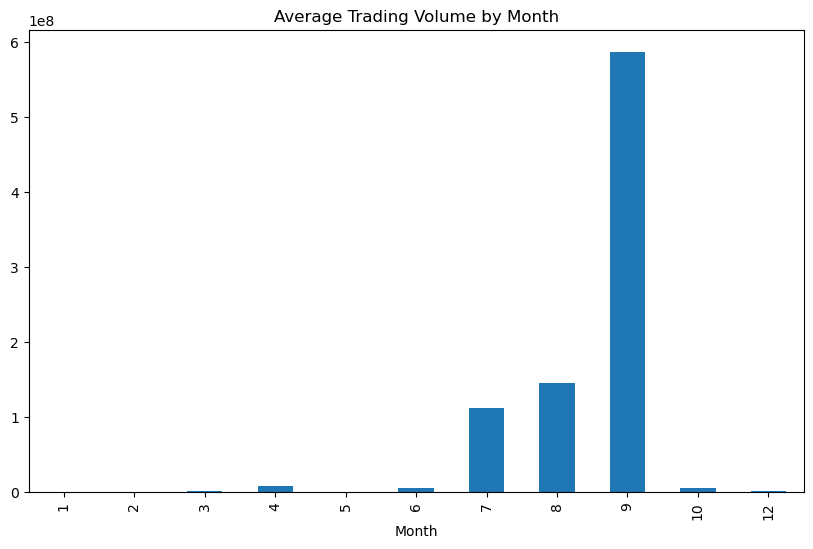

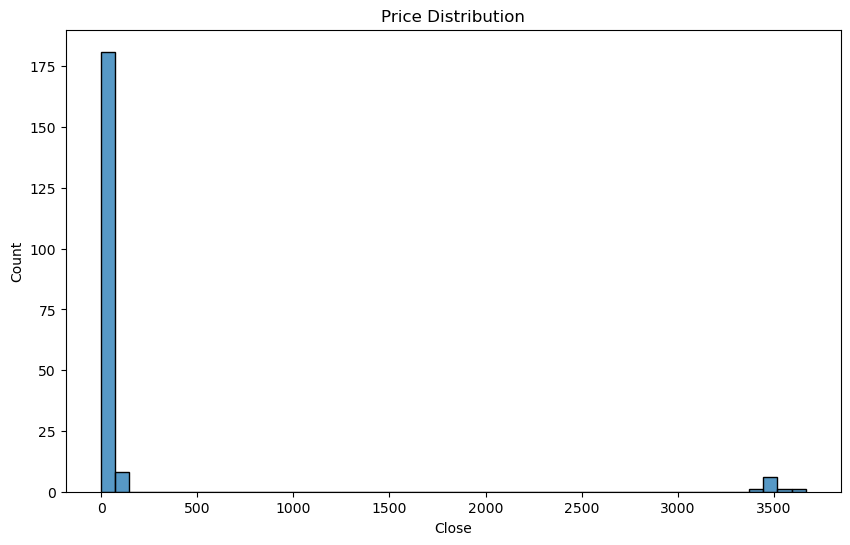

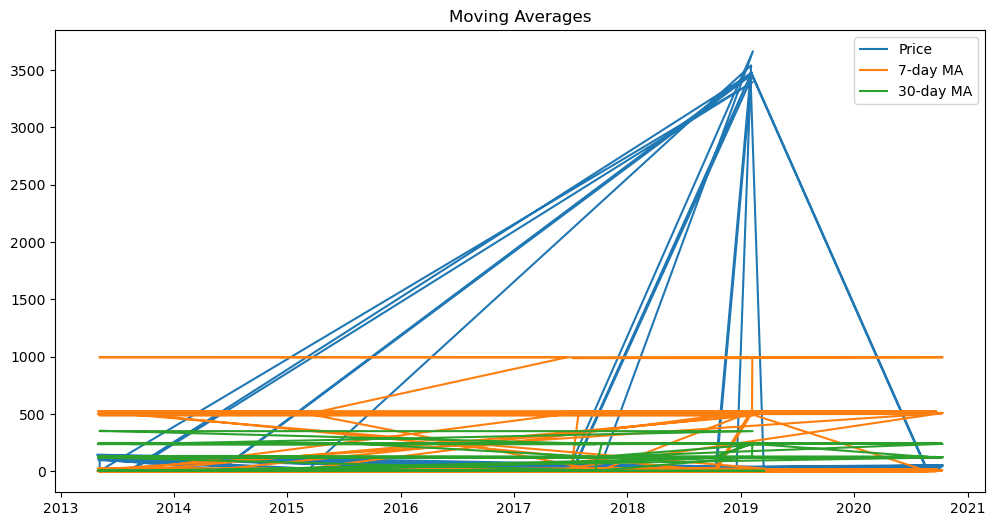

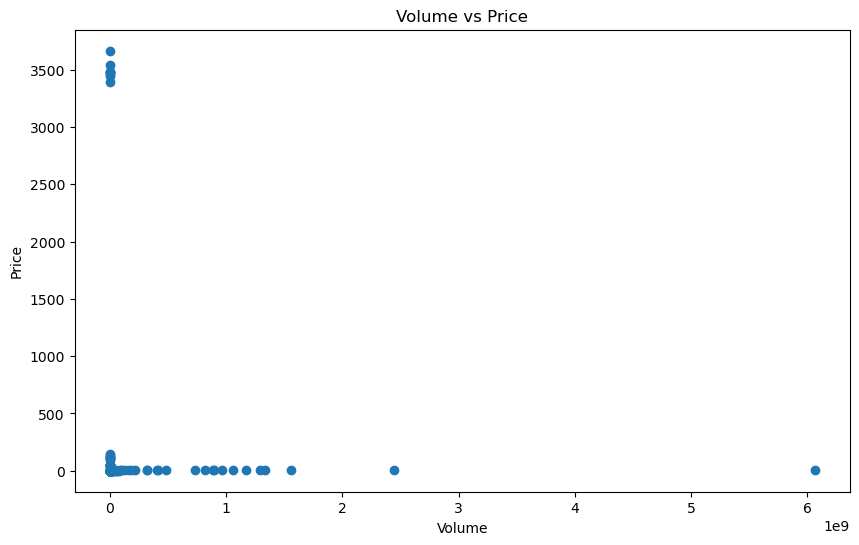

Highest Price: 3760.554056
Lowest Price: 0.000115593


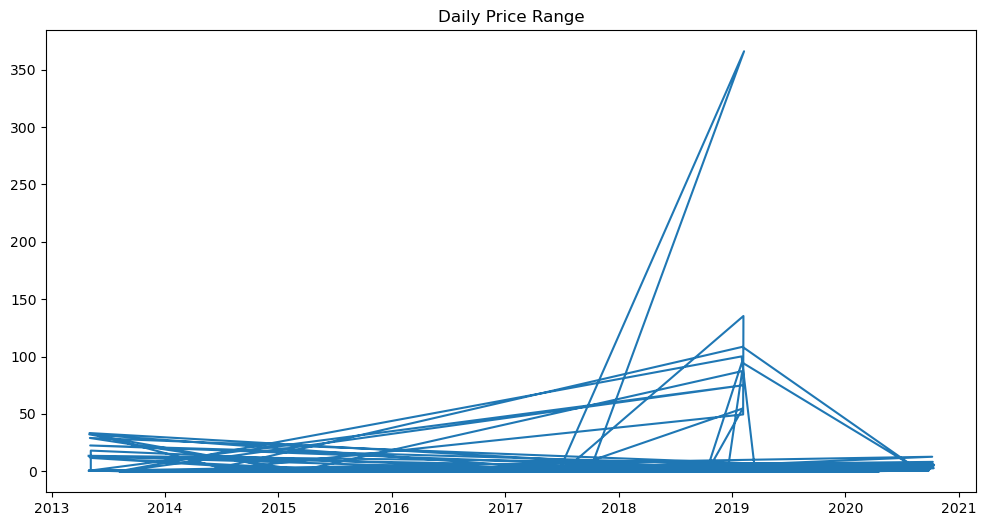

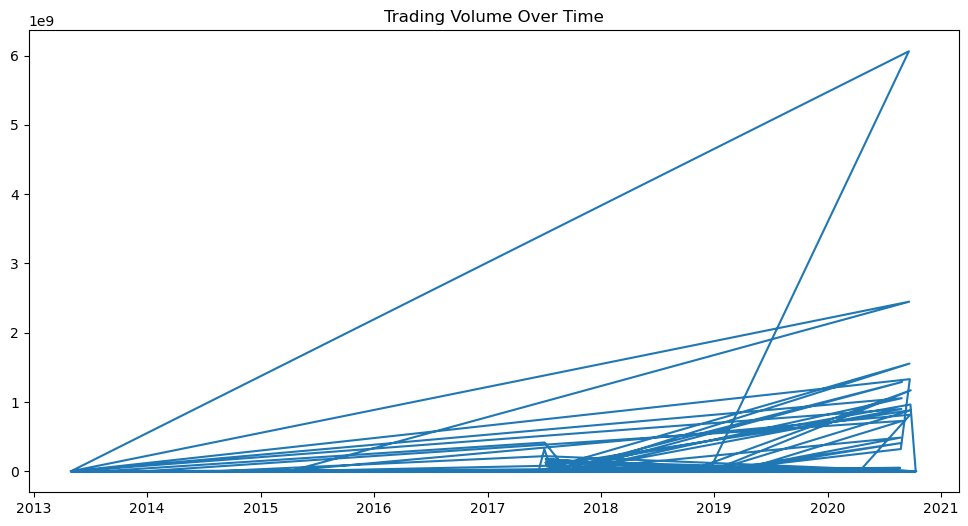

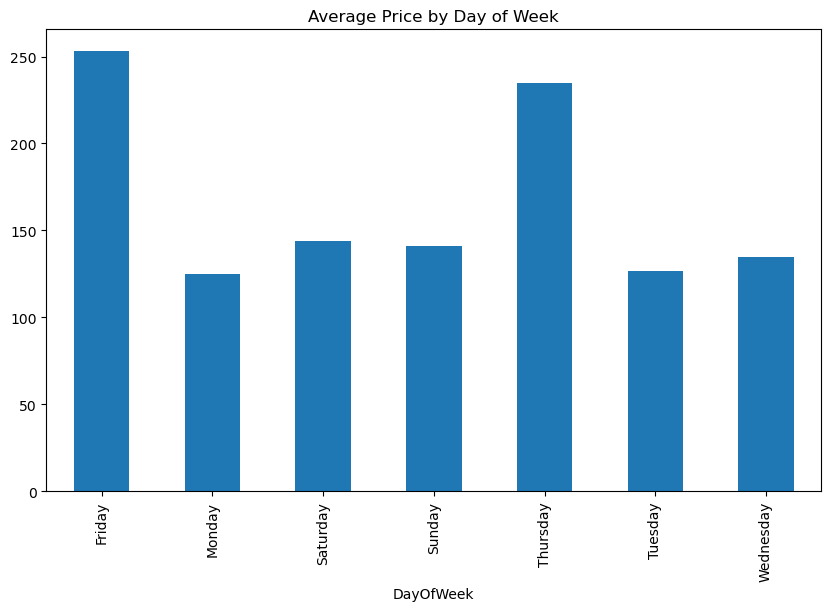

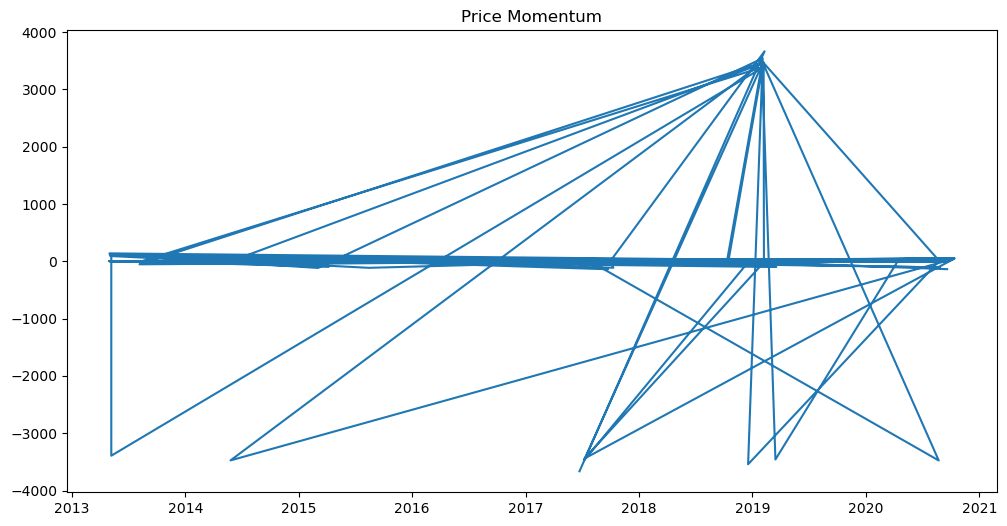

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Function to filter data by date range
def filter_by_date_range(df, start_date, end_date):
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    return df.loc[mask]

# Load and prepare the data
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# Create all analysis plots
def create_analysis_plots(df, start_date, end_date):
    # Filter data for the specified date range
    filtered_df = filter_by_date_range(df, start_date, end_date)
    
    # Set the style for all plots
    plt.style.use('seaborn')
    
    # 1. Price Trend
    plt.figure(figsize=(15, 8))
    plt.plot(filtered_df['Date'], filtered_df['Close'])
    plt.title('Cryptocurrency Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 2. Daily Volatility
    filtered_df['Daily_Return'] = filtered_df['Close'].pct_change()
    plt.figure(figsize=(15, 8))
    plt.plot(filtered_df['Date'], filtered_df['Daily_Return'])
    plt.title('Daily Price Volatility')
    plt.xlabel('Date')
    plt.ylabel('Daily Returns')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 3. Correlation Matrix
    plt.figure(figsize=(10, 8))
    correlation = filtered_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # 4. Monthly Volume
    filtered_df['Month'] = filtered_df['Date'].dt.month
    monthly_volume = filtered_df.groupby('Month')['Volume'].mean()
    plt.figure(figsize=(12, 6))
    monthly_volume.plot(kind='bar')
    plt.title('Average Trading Volume by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Volume')
    plt.tight_layout()
    plt.show()
    
    # 5. Price Distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(filtered_df['Close'], bins=50, kde=True)
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    # 6. Moving Averages
    filtered_df['MA7'] = filtered_df['Close'].rolling(window=7).mean()
    filtered_df['MA30'] = filtered_df['Close'].rolling(window=30).mean()
    plt.figure(figsize=(15, 8))
    plt.plot(filtered_df['Date'], filtered_df['Close'], label='Price', alpha=0.5)
    plt.plot(filtered_df['Date'], filtered_df['MA7'], label='7-day MA')
    plt.plot(filtered_df['Date'], filtered_df['MA30'], label='30-day MA')
    plt.title('Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 7. Volume vs Price
    plt.figure(figsize=(12, 6))
    plt.scatter(filtered_df['Volume'], filtered_df['Close'], alpha=0.5)
    plt.title('Volume vs Price')
    plt.xlabel('Volume')
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()
    
    # 8. Print Statistics
    print("\nKey Statistics for selected period:")
    print(f"Highest Price: {filtered_df['High'].max():.2f}")
    print(f"Lowest Price: {filtered_df['Low'].min():.2f}")
    print(f"Average Daily Volume: {filtered_df['Volume'].mean():.2f}")
    
    # 9. Daily Range
    filtered_df['Daily_Range'] = filtered_df['High'] - filtered_df['Low']
    plt.figure(figsize=(15, 8))
    plt.plot(filtered_df['Date'], filtered_df['Daily_Range'])
    plt.title('Daily Price Range')
    plt.xlabel('Date')
    plt.ylabel('Price Range')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 10. Volume Trend
    plt.figure(figsize=(15, 8))
    plt.plot(filtered_df['Date'], filtered_df['Volume'])
    plt.title('Trading Volume Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 11. Weekly Pattern
    filtered_df['DayOfWeek'] = filtered_df['Date'].dt.day_name()
    weekly_avg = filtered_df.groupby('DayOfWeek')['Close'].mean()
    plt.figure(figsize=(12, 6))
    weekly_avg.plot(kind='bar')
    plt.title('Average Price by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 12. Price Momentum
    filtered_df['Momentum'] = filtered_df['Close'].diff()
    plt.figure(figsize=(15, 8))
    plt.plot(filtered_df['Date'], filtered_df['Momentum'])
    plt.title('Price Momentum')
    plt.xlabel('Date')
    plt.ylabel('Momentum')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main execution
def main():
    # Load the data
    file_path = "C:\\Users\\HIMANSHU\\OneDrive\\Desktop\\st\\cleaned_sorted_output_cleaned.csv"
    df = load_data(file_path)
    
    # Get date range from user
    print("\nAvailable date range:", df['Date'].min().strftime('%Y-%m-%d'), "to", df['Date'].max().strftime('%Y-%m-%d'))
    
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")
    
    # Convert input strings to datetime
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Create all analysis plots
    create_analysis_plots(df, start_date, end_date)

if __name__ == "__main__":
    main()